<a href="https://colab.research.google.com/github/thofes/judging_SJ_BA/blob/main/NN_1575_norm_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [42]:
#import json files 1575

import os
import json
import numpy as np
from sklearn.utils import shuffle

PATH = "/content.gdrive/MyDrive/Datasets_1575"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1575))
y = np.empty(shape=0)



for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])

    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)
X,y = shuffle(X,y)
with np.printoptions(threshold=np.inf):
    print(y)

print(X.shape)
print(y.shape)
print(y)
print(X)

['data_manually_labeled_original.json', 'data_manually_labled_Telemark_mirror.json', 'data_PseudoLabeled_last_1805.json', 'data_PseudoLabeled_1_50.json', 'data_Manually_Labeled_11042022.json', 'data_Manually_Labeled_mirror_09042022.json', 'data_Manually_Labeled_09042022.json', 'data_PseudoLabeled_251_300.json', 'data_PseudoLabeled_201_250.json', 'data_PseudoLabeled_151_200.json', 'data_PseudoLabeled_101_150.json', 'data_PseudoLabeled_51_100.json', 'data_PseudoLabeled_601_650.json', 'data_PseudoLabeled_551_600.json', 'data_PseudoLabeled_501_550.json', 'data_PseudoLabeled_451_500.json', 'data_PseudoLabeled_401_450.json', 'data_PseudoLabeled_351_400.json', 'data_PseudoLabeled_301_350.json', 'data_PseudoLabeled_851_900.json', 'data_PseudoLabeled_801_850.json', 'data_PseudoLabeled_751_800.json', 'data_PseudoLabeled_701_750.json', 'data_PseudoLabeled_651_700.json', 'data_PseudoLabeled_1151_1200.json', 'data_PseudoLabeled_1101_1150.json', 'data_PseudoLabeled_1051_1100.json', 'data_PseudoLabel

In [43]:
# 50:50 verteilung
counter = 0
index0 = []
for i,x in enumerate(np.nditer(y)):
  if x == 0 and counter <470:
      counter+=1
      index0.append(i)

print(counter)
print(index0)
X = np.delete(X, index0, 0)
y = np.delete(y, index0, None)

print(X.shape)
print(y.shape)
print(y)
print(X)

470
[0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 22, 23, 26, 31, 33, 35, 36, 37, 38, 40, 41, 44, 45, 46, 48, 49, 50, 52, 55, 56, 58, 61, 65, 68, 71, 72, 73, 75, 76, 77, 78, 79, 83, 84, 85, 88, 89, 92, 94, 96, 97, 98, 99, 102, 103, 108, 110, 112, 115, 120, 121, 122, 123, 125, 126, 127, 128, 129, 131, 132, 133, 134, 139, 140, 141, 142, 144, 145, 146, 147, 151, 153, 154, 155, 156, 158, 159, 161, 164, 165, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 181, 182, 183, 185, 187, 190, 193, 194, 195, 197, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 227, 228, 229, 230, 231, 234, 236, 238, 240, 241, 242, 243, 249, 251, 252, 253, 254, 256, 257, 258, 259, 261, 264, 265, 266, 267, 268, 269, 271, 272, 275, 276, 281, 283, 285, 287, 288, 289, 292, 293, 294, 295, 297, 298, 300, 302, 303, 304, 307, 310, 312, 313, 314, 315, 317, 318, 320, 321, 322, 323, 327, 330, 331, 332, 333, 334, 335, 337, 339, 340, 342, 343, 345, 347, 348, 349, 350, 3

In [44]:
# Relevante KP 945
#with np.printoptions(threshold=np.inf):
    #print(X[0])
print(X.shape)
counter_alt =0
for x in X:
  for k in x:
      if k == 0:
          counter_alt+= 1

print(counter_alt)

delete_index = []
for i in range(21):
    liste = [*range(45+(i*75),75+(i*75),1)]
    delete_index.append(liste)

flat_list = [item for sublist in delete_index for item in sublist]

print(flat_list)
X = np.delete(X, delete_index, axis=1)



print(X.shape)
#with np.printoptions(threshold=np.inf):
    #print(X[0])

counter_neu =0
for x in X:
  for k in x:
      if k == 0:
          counter_neu+= 1
print(counter_neu)

(2417, 1575)
1119702
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516

In [45]:
co=0
for x in y:
    if x ==0:
      co+=1

print(co)


1209


In [7]:

!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [50]:
#Creating binary classification model 1575
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM, Conv2D, Flatten,GlobalMaxPooling1D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy
from sklearn.utils import shuffle
import tensorflow_addons as tfa





def Ranger(sync_period=6,
           slow_step_size=0.5,
           learning_rate=0.001,
           beta_1=0.9,
           beta_2=0.999,
           epsilon=1e-7,
           weight_decay=0.,
           amsgrad=False,
           sma_threshold=5.0,
           total_steps=0,
           warmup_proportion=0.1,
           min_lr=0.,
           name="Ranger"):
    inner = tfa.optimizers.RectifiedAdam(learning_rate, beta_1, beta_2, epsilon, weight_decay, amsgrad, sma_threshold, total_steps, warmup_proportion, min_lr, name)
    optim = tfa.optimizers.Lookahead(inner, sync_period, slow_step_size, name)
    return optim



model = Sequential([
    
    Dense(units=1200, input_shape=(945,1), activation='relu'), 
    #Dense(units=1575, activation='relu'),
    
    #Reshape((945,1)),                   
    Conv1D(filters=32, kernel_size=45, strides=3, padding='same', activation='relu'), # input_shape=(945,1),
    Dropout(0.15),
    Conv1D(filters=64, kernel_size=15, strides=15, padding='same', activation='relu'),
    Dropout(0.15),
    LSTM(21), #, return_sequences=True
    Dropout(0.15),
    Dense(units=1, activation='sigmoid') #sigmoid
])

save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Ranger(), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 945, 1200)         2400      
                                                                 
 conv1d_28 (Conv1D)          (None, 315, 32)           1728032   
                                                                 
 dropout_42 (Dropout)        (None, 315, 32)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 21, 64)            30784     
                                                                 
 dropout_43 (Dropout)        (None, 21, 64)            0         
                                                                 
 lstm_14 (LSTM)              (None, 21)                7224      
                                                                 
 dropout_44 (Dropout)        (None, 21)              

In [51]:
history = model.fit(x=X, y=y, batch_size=40, validation_split = 0.2, epochs=1000, shuffle=True, verbose = 2, callbacks=[save_callback])

Epoch 1/1000
49/49 - 18s - loss: 0.6920 - accuracy: 0.5256 - val_loss: 0.7048 - val_accuracy: 0.4070 - 18s/epoch - 369ms/step
Epoch 2/1000
49/49 - 13s - loss: 0.6896 - accuracy: 0.5546 - val_loss: 0.7019 - val_accuracy: 0.4194 - 13s/epoch - 264ms/step
Epoch 3/1000
49/49 - 13s - loss: 0.6845 - accuracy: 0.5541 - val_loss: 0.6830 - val_accuracy: 0.5744 - 13s/epoch - 263ms/step
Epoch 4/1000
49/49 - 13s - loss: 0.6734 - accuracy: 0.5887 - val_loss: 0.6688 - val_accuracy: 0.6157 - 13s/epoch - 265ms/step
Epoch 5/1000
49/49 - 13s - loss: 0.6530 - accuracy: 0.6260 - val_loss: 0.6308 - val_accuracy: 0.6322 - 13s/epoch - 262ms/step
Epoch 6/1000
49/49 - 13s - loss: 0.6409 - accuracy: 0.6405 - val_loss: 0.6380 - val_accuracy: 0.6198 - 13s/epoch - 263ms/step
Epoch 7/1000
49/49 - 13s - loss: 0.6060 - accuracy: 0.6710 - val_loss: 0.6086 - val_accuracy: 0.6508 - 13s/epoch - 262ms/step
Epoch 8/1000
49/49 - 13s - loss: 0.5946 - accuracy: 0.6844 - val_loss: 0.6003 - val_accuracy: 0.6426 - 13s/epoch - 264

KeyboardInterrupt: ignored

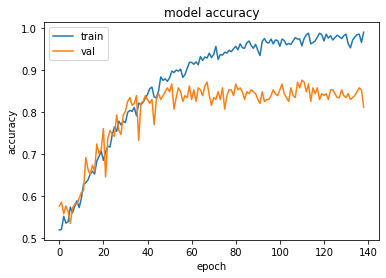

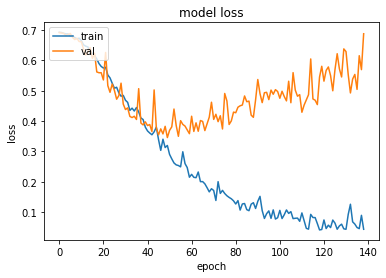

In [39]:

import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content.gdrive/MyDrive/NN_945_ohne_Dense')

INFO:tensorflow:Assets written to: /content.gdrive/MyDrive/NN_945_ohne_Dense/assets


INFO:tensorflow:Assets written to: /content.gdrive/MyDrive/NN_945_ohne_Dense/assets


In [ ]:
import json
import numpy as np
with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X2 = np.array(data2["keypoints"])
y2 = np.array(data2["labels"])

predictions = model.predict(X2, batch_size = 10, verbose =0)

print(predictions, y2)
counter =0
for i, x in enumerate(predictions):
    if np.around(x) != y2[i]:
        counter+=1
print(y2.shape)
print(counter)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content.gdrive/MyDrive/Model_1575_norm_crop')

In [ ]:
model.summary()